### Test code 

In [1]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
def order_by_slice_location(slice):
    return float(slice.GetMetaData('0020|1041'))

# def non_contrast_only(slice):
#     if 'Monoenergetic Plus Knee Noncontrast#0' in slice.GetMetaData('0008|103E'):
#         return True

path = r'C:\Users\T2025\Desktop\cadaver_knee_study\data\PCCT\ME_data\07_2017'
dicom_filenames = os.listdir(path)

# only include the non-constrast images
list_of_slices = []
for filename in dicom_filenames:
    dicom_path = os.path.join(path, filename)
    slice = sitk.ReadImage(dicom_path)
    if 'Monoenergetic Plus Knee Noncontrast#0' in slice.GetMetaData('0008|103e'):
        list_of_slices.append(slice)

list_of_slices.sort(key=order_by_slice_location, reverse=True)


volume_list = []
for slice in list_of_slices:
    volume_list.append(sitk.GetArrayViewFromImage(slice)[0])


image_array = np.array(volume_list)

In [4]:
import matplotlib.pyplot as plt
from scrollview import ScrollView
%matplotlib qt

plt.imshow(image_array[222])
plt.show()

fig, ax = plt.subplots()
ScrollView(image_array).plot(ax, cmap='bone')


In [2]:
import pydicom 

pydicom.dcmread(r'C:\Users\T2025\Desktop\cadaver_knee_study\data\PCCT\ME_data\07_2017\Beeldvorming-Dr.CT.Knie_ortho(Adul.706.1.2024.04.12.15.26.50.347.45936128.dcm') 

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.8.15.134422.30000024041213381933800009142
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.8.15.10.20090701
(0002, 0013) Implementation Version Name         SH: 'syngo.via'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'AXIAL', 'MAT_REMOVED', 'CT_SOM8 DEVNC', 'VNC', 'COUNT']
(0008, 0012) Instance Creation Date              DA: '20240412'
(0008, 0013) Instance Creation Time              TM: '152511.455284'
(0008, 0016) SOP Class UID       

In [5]:
import preprocessPCCT as preproc

image3D = preproc.create3D_input(path)


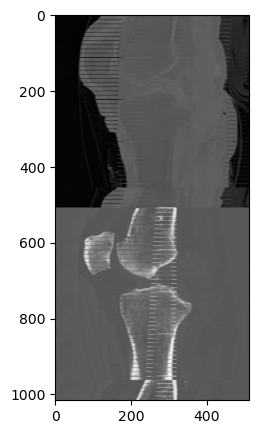

In [7]:
mhd_path = r'E:\ME_data_mhd\08_2017\08_2017.mhd'
itk_image = sitk.ReadImage(mhd_path)
image_array = sitk.GetArrayViewFromImage(itk_image)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.imshow(image_array[:,:,250], cmap='gray')

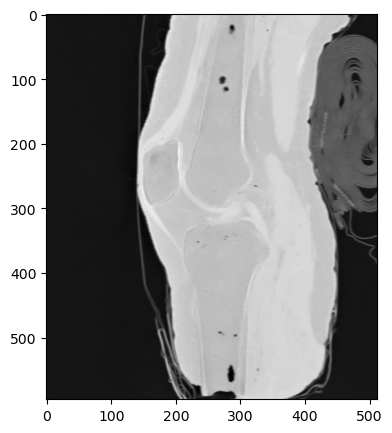

In [25]:
mhd_path = r'E:\ME_data_mhd\30_2017\30_2017.mhd'
itk_image = sitk.ReadImage(mhd_path)
image_array = sitk.GetArrayViewFromImage(itk_image)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.imshow(image_array[:,:,250], cmap='gray')

In [12]:
mhd_path = r'E:\ME_data\12_2018\12_2018.mhd'
itk_image = sitk.ReadImage(mhd_path)
image_array = sitk.GetArrayViewFromImage(itk_image)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.imshow(image_array[:,:,250], cmap='gray')

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: D:\a\1\sitk\Code\IO\src\sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "E:\ME_data\12_2018\12_2018.mhd" does not exist.

In [ ]:
mhd_path = r'E:\ME_data_mhd\08_2017\08_2017.mhd'
itk_image = sitk.ReadImage(mhd_path)
image_array1 = sitk.GetArrayViewFromImage(itk_image)

mhd_path = r'E:\ME_data_mhd\07_2017\07_2017.mhd'
itk_image = sitk.ReadImage(mhd_path)
image_array2 = sitk.GetArrayViewFromImage(itk_image)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].imshow(image_array1[:,:,250], cmap='gray')
ax[1].imshow(image_array2[:,:,250], cmap='gray')



: 

In [2]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [27]:

mhd_path = r'E:\ME_data_mhd_fl\08_2017\08_2017.mhd'
itk_image = sitk.ReadImage(mhd_path)
image_array1 = sitk.GetArrayViewFromImage(itk_image)
image_array1.shape

# nrrd_path = r'E:\segmentations PCCT Tim\masks\08_2017.nrrd'
# itk_image = sitk.ReadImage(nrrd_path)
# image_array2 = sitk.GetArrayViewFromImage(itk_image)

# fig, ax = plt.subplots(1, 2, figsize=(20, 5))
# ax[0].imshow(image_array1[:,:,250], cmap='gray')
# ax[1].imshow(image_array2[:,:,250], cmap='gray')


(508, 512, 512)

In [28]:
nrrd_path = r'E:\segmentations PCCT Tim\masks\08_2017.nrrd'
itk_image2 = sitk.ReadImage(nrrd_path)
image_array2 = sitk.GetArrayViewFromImage(itk_image2)
# image_array2.shape
# image_array2 = np.flip(image_array2, axis=0)

In [29]:
image_array2.shape

(508, 512, 512)

In [30]:
masked_im = image_array2*image_array1

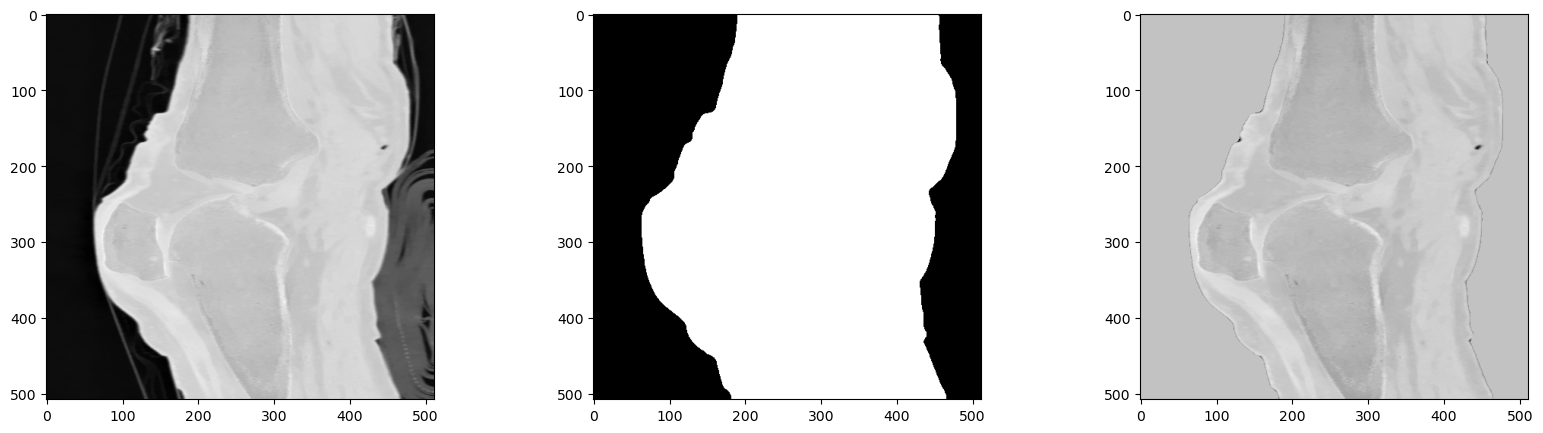

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(image_array1[:,:,250], cmap='gray')
ax[1].imshow(image_array2[:,:,250], cmap='gray')
ax[2].imshow(masked_im[:,:,250], cmap='gray')

In [3]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

fix_path = r'E:\ME_data_mhd_fl\08_2017R\08_2017R.mhd'
itk_image = sitk.ReadImage(fix_path)
image_array1 = sitk.GetArrayViewFromImage(itk_image)



In [1]:
mov_path = r'E:\atlas_registration_results_trial4\affine_atlas_img_17_2016_fixed_0_2019\transformix_results\result.mhd'
itk_image = sitk.ReadImage(mov_path)

image_array2 = sitk.GetArrayViewFromImage(itk_image)

NameError: name 'sitk' is not defined

In [5]:
or_mov_path = r'E:\ME_data_mhd\17_2016\17_2016.mhd'
itk_image = sitk.ReadImage(or_mov_path)
image_array3 = sitk.GetArrayViewFromImage(itk_image)

In [1]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

or_mov_path = r'E:\ME_data_mhd\17_2016\17_2016.mhd'
itk_image = sitk.ReadImage(or_mov_path)
image_array4 = sitk.GetArrayViewFromImage(itk_image)

mask_path = r'E:\segmentations PCCT Tim\masks\17_2016.nrrd'
itk_image5 = sitk.ReadImage(mask_path)
image_array5 = sitk.GetArrayViewFromImage(itk_image5)


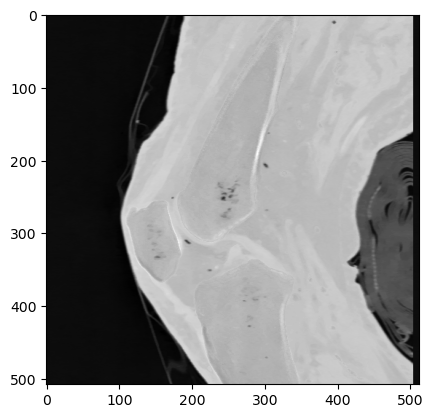

In [6]:
imgplot = plt.imshow(image_array1[:,:,250], cmap='gray')

In [7]:
imgplot = plt.imshow(image_array2[:,:,250], cmap='gray')

: 

In [5]:
or_mov_path = r'E:\segmentations PCCT Tim\masks\17_2016.nrrd'
itk_image = sitk.ReadImage(or_mov_path)
image_array5 = sitk.GetArrayViewFromImage(itk_image)

: 

In [4]:
masked_array4 = image_array5*image_array4

: 

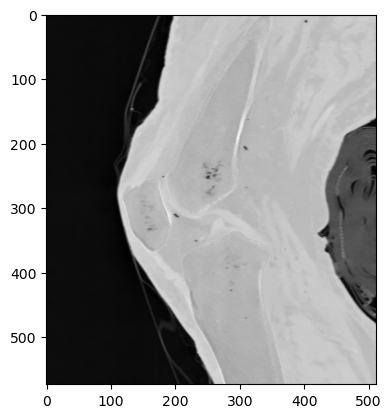

In [4]:
imgplot = plt.imshow(image_array4[:,:,250], cmap='gray')


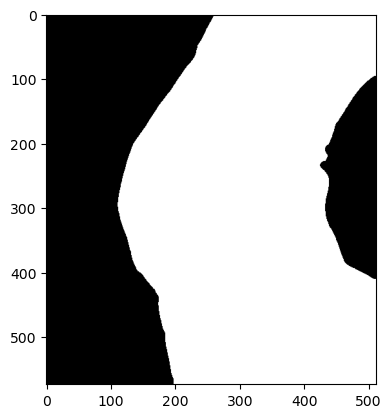

In [2]:
img_plot2 = plt.imshow(image_array5[:,:,250], cmap='gray')

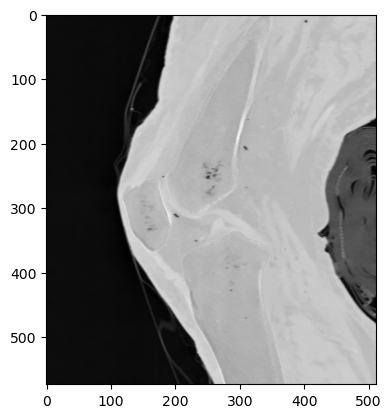

In [23]:
img3 = plt.imshow(image_array3[:,:,250], cmap='gray')

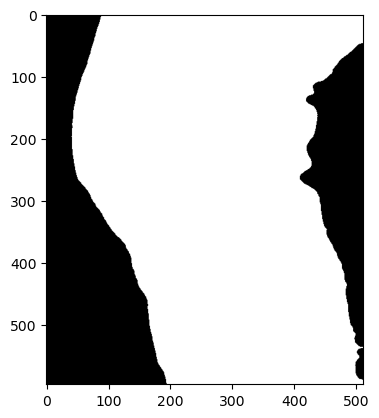

In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

im = r'E:\segmentations PCCT Tim\masks_flip\01_2019.mhd'
itk_image = sitk.ReadImage(im)
im_array = sitk.GetArrayViewFromImage(itk_image)

plt.imshow(im_array[:,:,250], cmap='gray')



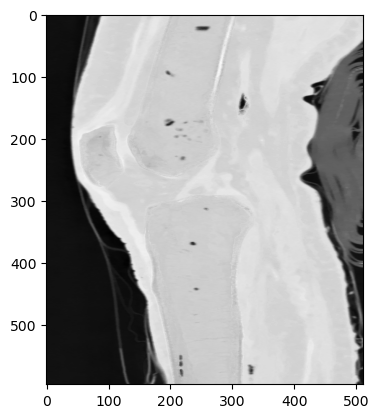

In [3]:
im = r'E:\ME_data_mhd\01_2019\01_2019.mhd'
itk_image = sitk.ReadImage(im)
im_array2 = sitk.GetArrayViewFromImage(itk_image)

plt.imshow(im_array2[:,:,250], cmap='gray')

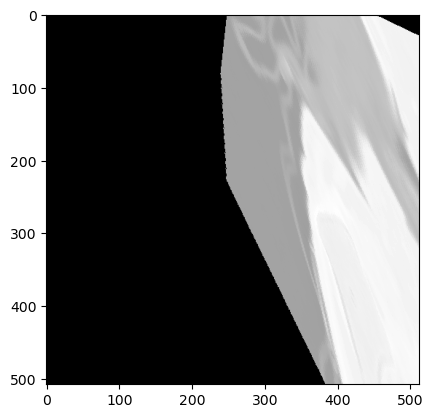

In [4]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

im = r'E:\atlas_registration_results_trial7\affine_atlas_img_07_2017_fixed__2017R\transformix_results\result.mhd'
itk_image = sitk.ReadImage(im)
im_array2 = sitk.GetArrayViewFromImage(itk_image)

plt.imshow(im_array2[:,:,250], cmap='gray')